in this jupyter notebook you will learn classification and cost classification complexicity prunning to build the classification tree model which uses continous and categorical data from UCI machine learning data set of heart disease 

classification trees are exceptionally usefull machinelearning methods when you need to know how decison are being made


in this lession you will learn about 
- importing data
- find missing data
-- indetifying missing data
-- dealing with missing data

_ formatting data for decision tree
-- spiltting data into dependent and independent variable
-- onehot encoding


- building a prelimenary classification tree
- optimizing the tree with cost complexcity pruning
-- visualizing alpha
-- using cross validation to find best value of alpha

- building drawing interpreting and evaluating the final classification tree



In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [23]:
df=pd.read_csv("processed.cleveland.data",header=None)

In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


we seen that instead of nice column names there are numbers so ltest replace the columnnumber with column name

- age
- sex
- cp
- restbp
- chol
- fbs
- restacg
- thalach
- exang
- oldpeak
- slope
- ca
- thal
 - hd
 

In [31]:
df.columns=["age",
           "sex",
           "cp",
           "restbp",
           "chol","fbs","restesg","thalach","exang","oldpeak","slope","ca","thal","hd"]

df.head()

,age,sex,cp,restbp,chol,fbs,restesg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [32]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restesg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

we see that they are almost all float64 , however two columns ca and thal have the object type and one column hd  has int64 

the fact that the ca and thal columns have object data types suggests there is something fishy in in them object datatypes are used when there are mixture of things like mixture of numbers and letters in theory both ca and thal should just have a few values representing different categories so lets investigate whats going on by printing out their  nuique values ,we will start with cca

In [33]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

 we can see that ca contains number 0,1,2,3 and question mark  ? the numbers represent the number of blood vessels that we lit up by fluroscopy and the question marks repressent missing data
 
 
 now lets look att the unique values of thal
 
 again thal contains a mixture of  numbers , representing the different diagnosis from the thal heart scan and question mark ,whiich represent missing values
 

In [34]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

unfortunately the biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not.the first part of the process is the idetifying and dealing with missing data


missing data is simply a blank spaces  or a surrogates value like na . that indicate that we failed to collect data for one of the features .for example if we forgot to sk someones age or forgot to write it down ,then we would have a blank space in the dataset for that persons age


there are two ways to deal with missing data 

1. we can remove the rows that contain missing data from the dataset.this is relatively easy to do .but it wastes all of the other values that we collected.how a big of waste this depends on how important this missing value is for classifcation .for example if we are missing a value for age and age is not usefuel for classifying if people have HD or not .then it would be a shame to throw out all of someones data just because we do not have their age

2. we can impute the values that we are missing in this context imputes is just afancy way of saying  we can make an educated guess about what the value should be continuing our example where we are missing a value for age istead of throwing out the entire row data we can fill the mising value with the average age of the median age .or use some other ,more sophisiticated approach .to guess at an appropriate value

# dealing with missing data

In [43]:
len(df.loc[(df["ca"]=="?") | (df["thal"]=="?")])

6

so 6 out of 303 row or 2% contain missing values since 303-6-297 is plenty of data too build classification tree  we will remove the rows with mmissing values ,rather thn try to impute their values

since sklearn classification do not support datastes with missing values , we need to figure out what to do these question marks .we can either delete these patients from the training dataset or impute values for the missing data first lets see how many rows contain missing values

In [44]:
df.loc[(df["ca"]=="?") | (df["thal"]=="?")]

,age,sex,cp,restbp,chol,fbs,restesg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [51]:
df_no_missing=df.loc[(df["ca"]!="?") & (df["thal"]!="?")]

In [52]:
len(df_no_missing)

297

#  format data part1 : split the data into dependent and independent data variables


now we have taken care of the missing values ,we are raedy to tart formatting the data for making classification tree 


first sep is to split the data into two parts:


1) the columns of data that we use to make classification 
2) the cloumns of data that we want to predict



we will use the conventinal notation x to represent columns of  data that we use to make classification tree
and y t represnt the thing we want to predict  in this case we want to predict HD



note: in the code below we are using copy() to copy the data by value because pandas by default copy the data by reference  using copyu ensures that the original data is not ,odified when we modify x andn y  in other words i

In [55]:
x=df_no_missing.drop("hd",axis=1).copy()
x

,age,sex,cp,restbp,chol,fbs,restesg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [64]:
y=df_no_missing["hd"].copy()
y.head()


0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# format the data part2  :onehot encoding

now that we have split the df into two places 

the below list tellls us what each variable represents and the type of dta i t should  contain




- age :float
- sex :category
-- 0=female
-- 1:male

- cp chest pain :category
-- 1 :typical angina
-- 2 atypical angina
-- 3 non anginal pain
-- 4 asymptomatic

- restbp : resting blood pressure in mm og  hf(float)
- chol :float
- fbs : fasting bllood sugar :category
-- 0=>=120
-- 1=<=120
- restecg category
-- 1 normal
-- 2 having st -t wawe abnormality
-- 3 : showing problems
- thalach
- exang: excersise included angina :cateogry
-- 0: no
-- 1 yes
- oldpeak :ST depression included by excercise relative to rest float 
- slope the slope of the peak excercise ST segment category
-- 1: upsloping
-- 2: flat
--3 : downslopping

- ca : number of majoir vessels coloured by floroscopy :float
- thal : thalium heart scan:category
-- 3 normal
-- 6:fixed
-- 7 reversible defrct



In [66]:
x["cp"].unique()

array([1., 4., 3., 2.])

so the good news is cp ontain only 4 values it is suppose to contain so we will convert it using onehotencoding into series of columns thal onli contain 0 and 1


note: there are many different ways  of to do onehotencoding in python .two of the most popular methods are columntransform() from sklearn and get_dummies() from pandaas and the both methods have pors and cons  columntransform() has very cool features where it create a persistent function that can validate data that you get in the future for eg if you build your decison tree using catagorical variable favorite colour that has red blue green options .then columntransform can remember those options and later on when your decision tree is being used in a production system .if someone say that favorite colur is orange then column transform can throw an error or handle the situation in some other nice way .the downside of columntransform() is that it turns your data inot an array and loose all ot the cloumn names making it harder to verify that your columntransformer() workded as intended it to contrast ,getdummies() leave your  data into a dataframe and retains the column name making it easier .however it does not have the persistent behevoiur as that of columntransfoer() 

In [1]:
pd.get_dummies(x,columns=["cp"]).head()

NameError: name 'pd' is not defined

so we  see that age restcp, chol and thalach are all float ,which is good  because we want to them to be a floating point numbers .all of the other columns ,however need to be inspected to make sure they only contain reasonable values and some of them need to be changed .this is because while sklearn decison tree natively supports continous data like restbp and thalach they do not natively support cateogircal data  like cp which contain 4 values in orrder to use catagorical data with sklearn decision tree we have to use a trick that converts a columns of catagorical data into multiple columns of binary values this trick is called onehotencoding

In [70]:
x_encoded=pd.get_dummies(x,columns=["cp","restesg","slope","thal"])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restesg_0.0,restesg_1.0,restesg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [73]:
y_not_zero_index=y>0
y[y_not_zero_index]=1
y.unique()

array([0, 1], dtype=int64)

# build a prelimenary classification tree

at long last the data are correctly formatted for making a classification trr .now we simply split the data into trainging and testing data and built the tree

In [74]:
x_train ,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42)

In [76]:
#create ds tree and fit it to data
clr_dt=DecisionTreeClassifier(random_state=42)
clr_dt=clr_dt.fit(x_train,y_train)

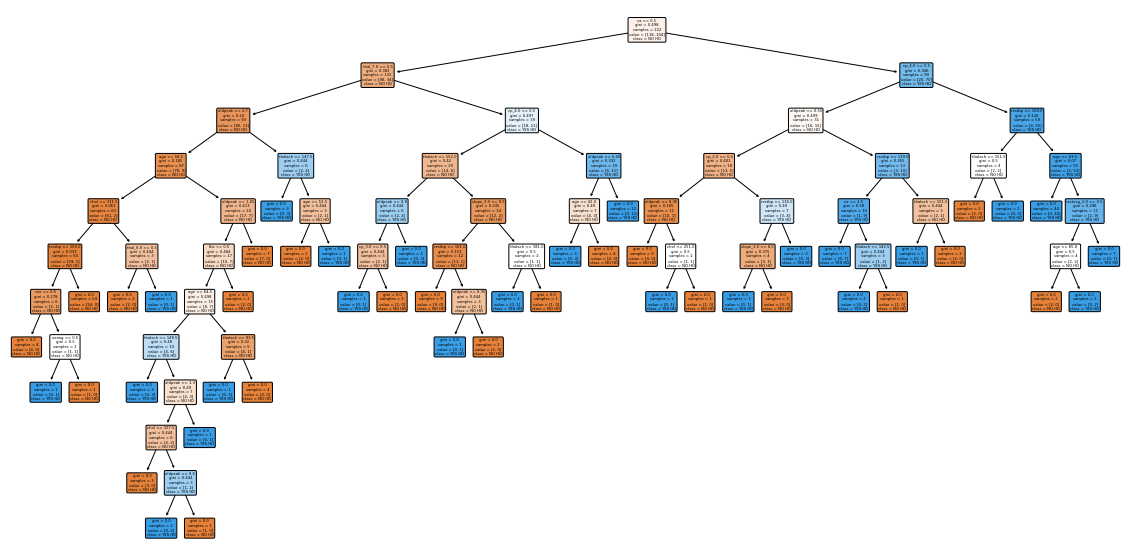

In [85]:
plt.figure(figsize=(20,10))
plot_tree(clr_dt,
         filled=True,
         rounded=True,
         class_names=["NO HD","YES HD"],
         
         feature_names=x_encoded.columns);

ok we have built the tree for classifcation .lets see how it perfroms on the testing datset by running testing dataset down the tree and  drawing a confusion matrix

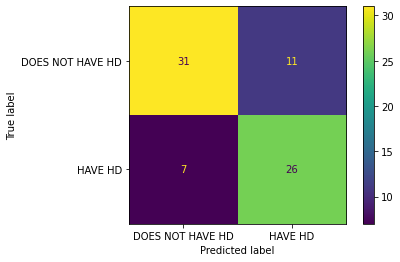

In [87]:
plot_confusion_matrix(clr_dt,x_test,y_test,display_labels=["DOES NOT HAVE HD","HAVE HD"])

in the confusion matrix we see that of the 31+11=42 people that did not have HD 31(74%)  were correctly classified and oof the 7+26=32 people that have HD 26 were correctly classfied  can we do better ? one thing that be  holding classification tree back is that it may have overfit the training dataste so lest prune the tree in theory should solve the overfitting problem and give us better results

# COST COMPLEXICIETY PRUNING PART1:VISUALIZE ALPHA

decision  tree are notorious for being overfit to the training dataset and there are lot of parameters like max_depth and min_sample that are designed to reduce overfitting however pruning a tree with cost complexcity pruning can smply the whole process of finding a similar tree that imporve the accuracy with the testing dataset


prunig a decision tree is alla bout finding the right value for the prunning parameter alpha which controls how little or how much prunning happens one way to find  optimal value for alpha is to plot the accuracy of the tree as afunction of different value .we will do this  for both the training and testing datset


first lets extract the different values of aplha that are available for this tree and build a pruned tree for each value for alpha 
note: we omit the maximum value of alpha with ccp_apha=ccp_alphas[:-1]  because it would prune all leavues ,leaving us with only root insted of tree

In [141]:
path=clr_dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

clf_dts=[]



for ccp_alpha in ccp_alphas:
    clr_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clr_dt.fit(x_train,y_train)
   
    clf_dts.append(clr_dt)
    
clf_dts
ccp_alphas


array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

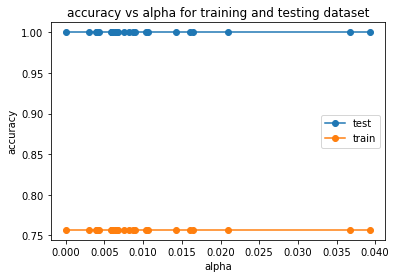

[0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568,
 0.7567567567567568]

In [142]:
train_score=[clr_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_score=[clr_df.score(x_test,y_test) for clf_dt in clf_dts]


fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing dataset")

ax.plot(ccp_alphas,test_score,marker="o",label="test",drawstyle="steps-post")

ax.plot(ccp_alphas,train_score,marker="o",label="train",drawstyle="steps-post")
ax.legend()
plt.show()

train_score



since there are so many ways to divide sataset into trainign and testing dataset .how do we know we used the best trainig dataset and how do we know we used the best testing dataset :? .typically we answer this question with 10 fold cross validation so that we are going to use cross val fuction to 

# ccp part 2 :cross validation for finding best alpha

<AxesSubplot:xlabel='tree'>

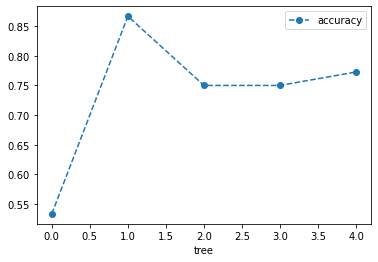

In [146]:
clf_df=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
scores=cross_val_score(clf_df,x_train,y_train,cv=5)


df=pd.DataFrame(data={"tree":range(5),"accuracy":scores})
df.plot(x="tree",y="accuracy",marker="o",linestyle="--")

<AxesSubplot:xlabel='tree'>

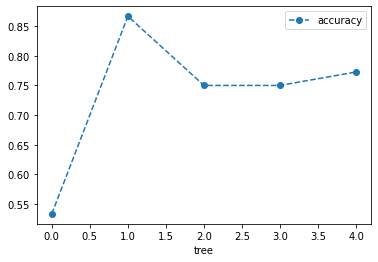

<AxesSubplot:xlabel='alpha'>

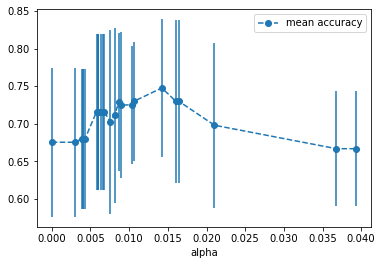

In [153]:
import numpy as np
alpha_loop_values=[]


for ccp_alpha in ccp_alphas:
    clf_df=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_df,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])
    
alpha_results=pd.DataFrame(alpha_loop_values,columns=["alpha","mean accuracy","std"])

alpha_results.plot(x="alpha",
                  y="mean accuracy",
                  yerr="std",
                  marker="o",
                  linestyle="--")

In [155]:
alpha_results[(alpha_results["alpha"]>0.014)&(alpha_results["alpha"]<0.015)]

20    0.014225
Name: alpha, dtype: float64

In [157]:
ideal_ccp_alpha=alpha_results[(alpha_results["alpha"]>0.014)&(alpha_results["alpha"]<0.015)]["alpha"]
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [159]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha


0.014224751066856332

# building evaluating ,drawing and interpreting final classification tree

In [161]:
clf_df_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha).fit(x_train,y_train)

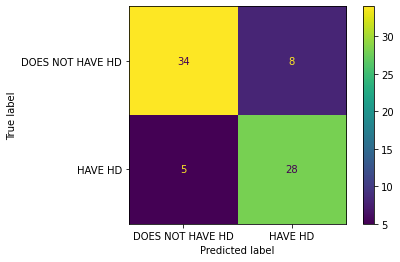

In [163]:
plot_confusion_matrix(clf_df_pruned,x_test,y_test
                     ,
                     display_labels=["DOES NOT HAVE HD","HAVE HD"])

    of the 34+8=42 people that did not have HD 34 -84% classfied correctly .this is an imporvement over the full sized tree which oly correctly classfied 74% of the patientes .without HD of the 5+28=33 people with HD 85% were correclty classfied again this is an impovement over the full sized tree which olny correctly classfiedd 79% of the patients with HD 

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = NO HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = NO HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = NO HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = NO HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = YES HD'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = YES HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = NO HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = YES HD'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = YES H

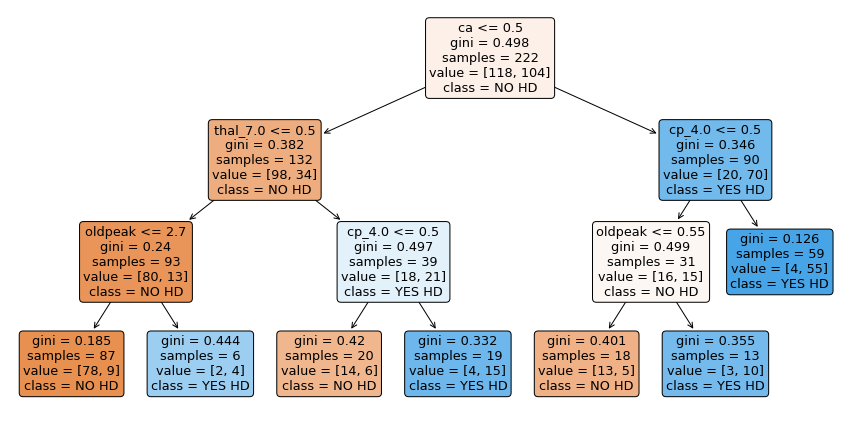

In [165]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_df_pruned,
         filled=True,
         rounded=True,
         class_names=["NO HD","YES HD"],
         feature_names=x_encoded.columns)

# in conclusion we

- imported data
- identified and dealt with missing  data
- formatted the data for decision trr for classification 
- built a prelimenary classification tree
- pruned the decison tree with coast complecity prunning
- built draw and interpreted the final decison tree